In [37]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [38]:
all_df = pd.read_csv("bank.csv")

In [39]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [40]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int)

In [41]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [42]:
Y = all_df['deposit'].values.astype('int64')

In [43]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [44]:
test_Features[:2]

array([[-0.85890111, -0.3021573 , -1.26574556, -0.8008745 , -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.14841574, -0.31455937,  0.51565047, -0.97372895, -0.18678537,
        -0.48118405, -0.36325984]])

In [45]:
train_Label[:4]

array([0, 1, 0, 1])

In [46]:
train_Features.shape

(8929, 7)

In [47]:
test_Label[:4]

array([0, 0, 0, 1])

In [48]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [49]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [51]:
model = Sequential()

In [52]:
model.add(Conv1D(filters=7*5,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(7,1), 
                 activation='relu'))

In [53]:
model.add(MaxPooling1D(pool_size=1))

In [54]:
model.add(Conv1D(filters=7*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [55]:
model.add(MaxPooling1D(pool_size=1))

In [56]:
model.add(Conv1D(filters=7*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [57]:
model.add(MaxPooling1D(pool_size=1))

In [58]:
model.add(Conv1D(filters=7*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [59]:
model.add(MaxPooling1D(pool_size=1))

In [60]:
model.add(Conv1D(filters=7,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [61]:
model.add(MaxPooling1D(pool_size=1))

In [62]:
model.add(Flatten())

In [63]:
model.add(Dense(7, activation='tanh'))

In [64]:
model.add(Dense(1,activation='sigmoid'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 7, 35)             70        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 35)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 7, 28)             1008      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 7, 28)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 7, 21)             609       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 7, 21)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 7, 14)             308       
__________

In [66]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [67]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=500,verbose=1,callbacks=[early_stopping])

Train on 7143 samples, validate on 1786 samples
Epoch 1/30
7143/7143 [==============================] - 6s 833us/step - loss: 0.6924 - acc: 0.5374 - val_loss: 0.6904 - val_acc: 0.5767
Epoch 2/30
7143/7143 [==============================] - 2s 280us/step - loss: 0.6878 - acc: 0.6018 - val_loss: 0.6837 - val_acc: 0.6377
Epoch 3/30
7143/7143 [==============================] - 1s 145us/step - loss: 0.6754 - acc: 0.6619 - val_loss: 0.6643 - val_acc: 0.6708
Epoch 4/30
7143/7143 [==============================] - 1s 162us/step - loss: 0.6414 - acc: 0.7014 - val_loss: 0.6143 - val_acc: 0.7116
Epoch 5/30
7143/7143 [==============================] - 2s 211us/step - loss: 0.5857 - acc: 0.7311 - val_loss: 0.5608 - val_acc: 0.7245
Epoch 6/30
7143/7143 [==============================] - 1s 207us/step - loss: 0.5402 - acc: 0.7420 - val_loss: 0.5237 - val_acc: 0.7486
Epoch 7/30
7143/7143 [==============================] - 1s 104us/step - loss: 0.5124 - acc: 0.7574 - val_loss: 0.5027 - val_acc: 0.7643


In [68]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

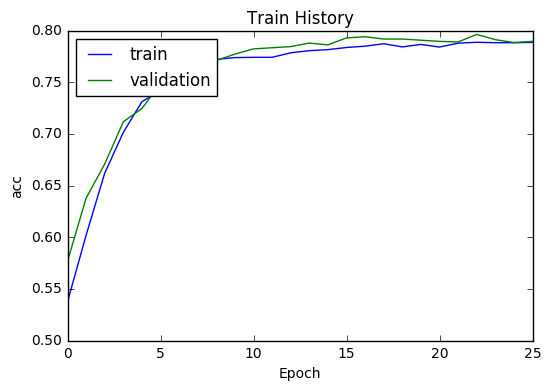

In [69]:
show_train_history(train_history,'acc','val_acc')

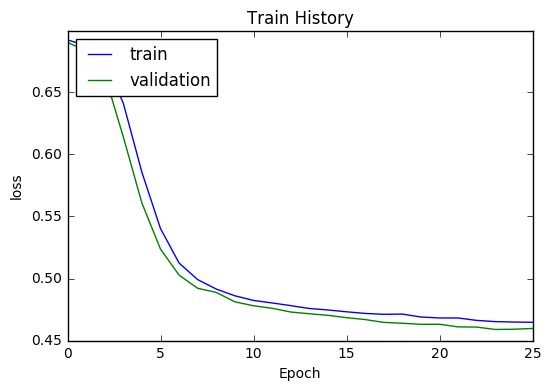

In [70]:
show_train_history(train_history,'loss','val_loss')

In [71]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 207us/step


In [72]:
scores[1]

0.7895208238968121